In [3]:
import openpyxl
import pandas as pd

In [59]:
# Load the Excel file
file_path = 'path_to_your_file.xlsx'
losses_data = pd.read_excel("JobLossesPrivateSector.xlsx")
gains_data = pd.read_excel("JobGainsPrivateSector.xlsx")
gains_data

,Year,Qtr1,Qtr2,Qtr3,Qtr4
0,2013,6941,7152,7058,7255
1,2014,6953,7454,7247,7617
2,2015,7046,7580,7344,7817
3,2016,7163,7443,7710,7413
4,2017,7434,7639,7321,7772
5,2018,7494,7688,7485,7719
6,2019,7460,7667,7383,7821
7,2020,7031,5733,10846,8786
8,2021,8324,8211,8862,9565
9,2022,8553,8352,8841,8108


In [23]:
# Melt the data to create a long-form dataframe for easier analysis
# Job Gains
gains_melted = gains_data.melt(id_vars=['Year'], value_vars=['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'],
                               var_name='Quarter', value_name='Job Gains')

# Job Losses
losses_melted = losses_data.melt(id_vars=['Year'], value_vars=['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'],
                                 var_name='Quarter', value_name='Job Losses')

# Find the quarter with the most job gains
max_gains = gains_melted.loc[gains_melted['Job Gains'].idxmax()]

# Find the quarter with the most job losses
max_losses = losses_melted.loc[losses_melted['Job Losses'].idxmax()]

# Display the results
print(f"Quarter with the most job gains: Year {max_gains['Year']}, {max_gains['Quarter']}, with {max_gains['Job Gains']} jobs gained.")
print(f"Quarter with the most job losses: Year {max_losses['Year']}, {max_losses['Quarter']}, with {max_losses['Job Losses']} jobs lost.")


Quarter with the most job gains: Year 2020, Qtr3, with 10846 jobs gained.
Quarter with the most job losses: Year 2020, Qtr2, with 20271 jobs lost.


In [32]:
# Filter the job gains and losses data to include only the years 2021, 2022, and 2023
filtered_gains = gains_data[gains_data['Year'].isin([2021, 2022, 2023])]
filtered_losses = losses_data[losses_data['Year'].isin([2021, 2022, 2023])]

# Melting the data to convert the wide-format data into long-format
gains_melted_filtered = filtered_gains.melt(id_vars=['Year'], value_vars=['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'],
                                            var_name='Quarter', value_name='Job Gains')

losses_melted_filtered = filtered_losses.melt(id_vars=['Year'], value_vars=['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'],
                                              var_name='Quarter', value_name='Job Losses')


# Finding the quarter with the most job gains
max_gains_filtered = gains_melted_filtered.loc[gains_melted_filtered['Job Gains'].idxmax()]

# Finding the quarter with the most job losses
max_losses_filtered = losses_melted_filtered.loc[losses_melted_filtered['Job Losses'].idxmax()]

# Display the results
print(f"Quarter with the most job gains: Year {max_gains_filtered['Year']}, {max_gains_filtered['Quarter']}, with {max_gains_filtered['Job Gains']} jobs gained.")
print(f"Quarter with the most job losses: Year {max_losses_filtered['Year']}, {max_losses_filtered['Quarter']}, with {max_losses_filtered['Job Losses']} jobs lost.")

Quarter with the most job gains: Year 2021, Qtr4, with 9565 jobs gained.
Quarter with the most job losses: Year 2022, Qtr2, with 7970 jobs lost.


In [63]:
filtered_losses

,Year,Qtr1,Qtr2,Qtr3,Qtr4
8,2021,6533,7226,7399,6691
9,2022,6978,7970,7500,7630
10,2023,7065,7788,7751,7479


In [64]:
filtered_gains

,Year,Qtr1,Qtr2,Qtr3,Qtr4
8,2021,8324,8211,8862,9565
9,2022,8553,8352,8841,8108
10,2023,8041,8120,7559,7823


In [57]:
# Filter out the year 2020 from the job gains and job losses data
filtered_gains_exclude_2020 = gains_data[gains_data['Year'] != 2020]
filtered_losses_exclude_2020 = losses_data[losses_data['Year'] != 2020]

gains_melted_filtered_exclude_2020 = filtered_gains_exclude_2020.melt(id_vars=['Year'], value_vars=['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'],
                                                                      var_name='Quarter', value_name='Job Gains')

losses_melted_filtered_exclude_2020 = filtered_losses_exclude_2020.melt(id_vars=['Year'], value_vars=['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4'],
                                                                        var_name='Quarter', value_name='Job Losses')

# Grouping by 'Quarter' to find total job gains and losses across all years (excluding 2020)
total_gains_by_quarter_exclude_2020 = gains_melted_filtered_exclude_2020.groupby('Quarter')['Job Gains'].sum().reset_index()
total_losses_by_quarter_exclude_2020 = losses_melted_filtered_exclude_2020.groupby('Quarter')['Job Losses'].sum().reset_index()

# Finding the quarter with the most job gains
max_gains_by_quarter_exclude_2020 = total_gains_by_quarter_exclude_2020.loc[total_gains_by_quarter_exclude_2020['Job Gains'].idxmax()]

# Finding the quarter with the most job losses
max_losses_by_quarter_exclude_2020 = total_losses_by_quarter_exclude_2020.loc[total_losses_by_quarter_exclude_2020['Job Losses'].idxmax()]

# Displaying the results
print(f"Quarter with the most job gains: {max_gains_by_quarter_exclude_2020.iloc[0]} {max_gains_by_quarter_exclude_2020.iloc[1]} jobs gained.")
print(f"Quarter with the most job losses: {max_losses_by_quarter_exclude_2020.iloc[0]} {max_losses_by_quarter_exclude_2020.iloc[1]} jobs lost.")

Quarter with the most job gains: Qtr4 78910 jobs gained.
Quarter with the most job losses: Qtr3 71784 jobs lost.


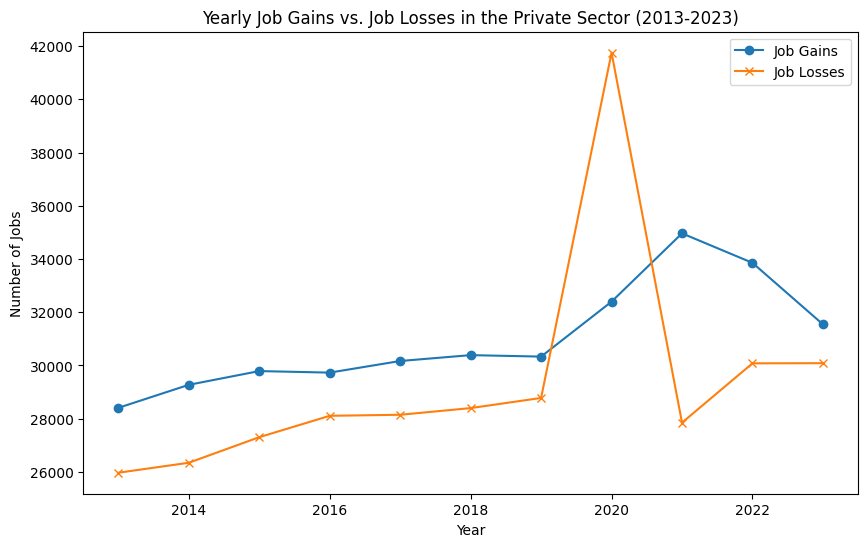

In [21]:
import matplotlib.pyplot as plt

# Summing quarterly data to get yearly totals
gains_data['Total_Gains'] = gains_data[['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4']].sum(axis=1)
losses_data['Total_Losses'] = losses_data[['Qtr1', 'Qtr2', 'Qtr3', 'Qtr4']].sum(axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(gains_data['Year'], gains_data['Total_Gains'], label='Job Gains', marker='o')
plt.plot(losses_data['Year'], losses_data['Total_Losses'], label='Job Losses', marker='x')
plt.title('Yearly Job Gains vs. Job Losses in the Private Sector (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Jobs')
plt.legend()
plt.show()
